# Time Series
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
# Yahoo history data
# import pandas_datareader as pdr
# stock = pdr.get_data_yahoo('053800.KQ','2016-12-21','2017-1-12') 

## Import Data
Date index

In [2]:
import pandas as pd
df = pd.read_csv('./data/AirPassengers.csv')
df = df.iloc[:,1:]
df.time = [str(int(t))+'-'+str(int(((t - int(t))*365)//30)+1)   for t in df.time]
df.set_index('time',inplace=True)
print(df.head())

        AirPassengers
time                 
1949-1            112
1949-2            118
1949-3            132
1949-4            129
1949-5            121


In [3]:
# dateparse = (lambda dates: pd.datetime.strptime(dates, '%Y-%m'))
# data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)

In [4]:
import pandas as pd
pd.datetime.strptime(df.index[2], '%Y-%m')

datetime.datetime(1949, 3, 1, 0, 0)

In [5]:
df.index = pd.to_datetime(df.index, dayfirst=True)
print(df.head())

            AirPassengers
time                     
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121


In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='time', length=144, freq=None)

## Index Slicing
Date index

In [7]:
# indexing
df[df.index =='1949-1-1']

,AirPassengers
time,
1949-01-01,112


In [8]:
df['1949']

,AirPassengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


Slicing Data<br>
데이터를 시간 값으로 검색

In [9]:
# Slicing
df[:'1949-3-1']

,AirPassengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [10]:
# Slicing
df['1949-2-1':'1949-5-1']

,AirPassengers
time,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Visualization
Basic plot

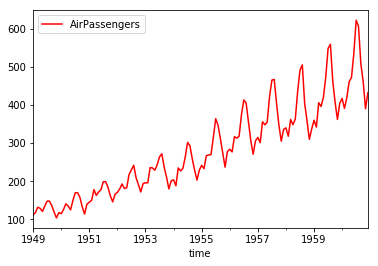

In [11]:
%matplotlib inline
df.plot(kind='line', color='r')

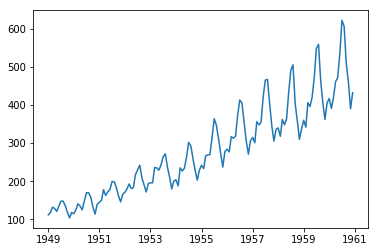

In [12]:
import matplotlib.pyplot as plt
plt.plot(df)

Stationarity Data<br>
Test statistic 값이 5% 미만이면  95% 신뢰도를 증명

def test_stationarity(timeseries):
    # 통계검증 연산값 계산하는 모듈을 호출
    from statsmodels.tsa.stattools import adfuller
    # 이동평균선 연산하기
    rolmean = timeseries.rolling(center=False , window=12).mean()
    rolstd = timeseries.rolling(center=False , window=12).std()
    # 그래프 출력하기
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation'); plt.show(block=False)
    # 통계검증 연산값 계산해서 출력하기
    print ('Results of Dickey-Fuller Test:' )
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/markbaum/Python/Jupyter/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


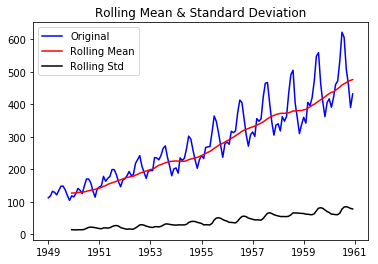

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
Critical Value (5%)             -2.884042
dtype: float64


In [14]:
# 12개월 평균선을 중심으로 화면에 출력
test_stationarity(df.AirPassengers)

Estimating & Eliminating Trend <br>
log Data (로그변환(log transformation) 이동 평균선)

- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

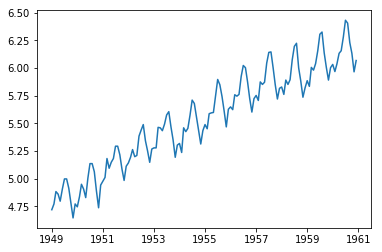

In [15]:
import numpy as np
ts_log = np.log(df.AirPassengers)
plt.plot(ts_log)

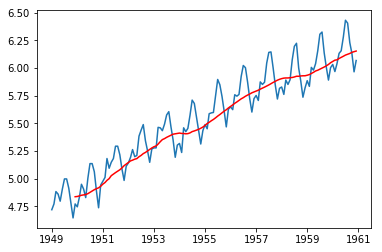

In [16]:
moving_avg = ts_log.rolling(center=False , window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

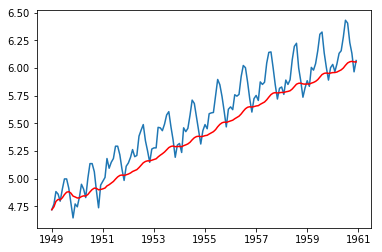

In [17]:
# 이동평균선의 직전값 대비 기울기 증가 분을 연산
# A popular one is exponentially weighted moving average where weights are assigned 
# to all the previous values with a decay factor #expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

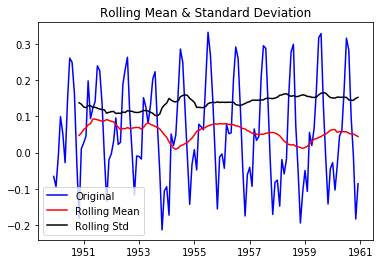

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
Critical Value (5%)             -2.886151
dtype: float64


In [18]:
# Log 이동선과 12개월 이동평균선의 차이값 출력  ( 차분(difference)값 계산 )
# 12 단계 평균을 생성시 앞 12개 데이터는 Nan으로 출력
# 통계값을 사용자함수 결과로 출력
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Eliminating Trend and Seasonality<br>
계절별 트랜드 변화를 비교

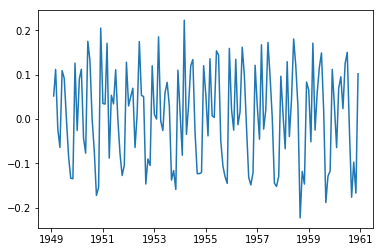

In [19]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

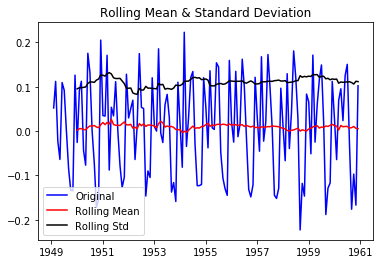

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
Critical Value (5%)             -2.884398
dtype: float64


In [20]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

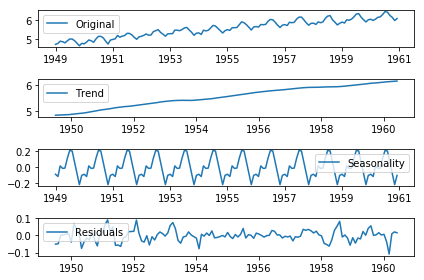

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411); plt.plot(ts_log, label='Original');     plt.legend(loc='best')
plt.subplot(412); plt.plot(trend, label='Trend');         plt.legend(loc='best')
plt.subplot(413); plt.plot(seasonal,label='Seasonality'); plt.legend(loc='best')
plt.subplot(414); plt.plot(residual, label='Residuals');  plt.legend(loc='best')
plt.tight_layout()

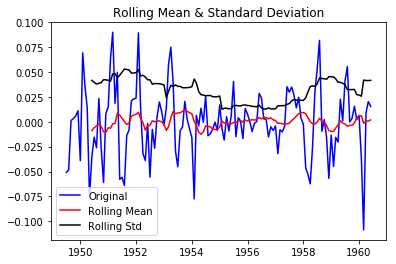

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
Critical Value (5%)           -2.885538e+00
dtype: float64


In [22]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Forecasting a Time Series
시계열 자료 예측하기
- 자기회귀(AR) 모형 : Yt=ϕYt−1+ϵt (평균: μ , 자기회귀계수: ϕ , 백색잡음: ϵt는 , 백색잡음 분산: σ2ϵ)    
- 이동평균(MA) 모형 : ϵt=Wt+θWt−1, 여기서 Wt는 백색잡음
- 자기회귀이동평균(ARMA) 모형 : Xt=ϕXt−1+Wt+θWt−1

    자기상관함수 (Autocorrelation Function (ACF)) : It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
    
    자기회귀: AR(p)           지수적 감소, 축퇴하는 사인 형태(tail off) 	
    이동평균: MA(p)           q+1 차항부터 절단모양 	
    자기회귀이동평균: ARMA(p,q)  q+1 차항부터 지수적 감소 혹은 축퇴하는 사인형태(tail off)

    편자기상관함수 (Partial Autocorrelation Function (PACF)) : This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

    편자기상관함수(PACF) 	
    자기회귀: AR(p)            p+1 차항부터 절단모양 	
    이동평균: MA(p)            지수적 감소, 축퇴하는 사인 형태(tail off) 	
    자기회귀이동평균: ARMA(p,q)   p+1 차항부터 지수적 감소 혹은 축퇴하는 사인형태(tail off)

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

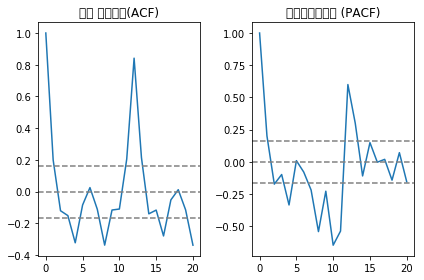

In [24]:
# 자기 상관함수 출력하기 (Plot ACF): 
plt.subplot(121) ; plt.plot(lag_acf); plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray'); plt.title('자기 상관함수(ACF)')
# 편자기상관함수 (Plot PACF):
plt.subplot(122); plt.plot(lag_pacf); plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray'); plt.title('편자기상관함수 (PACF)')
plt.tight_layout()

ARIMA Model <br>
Forecasting a Time Series

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  

AR model (자기회귀모델)

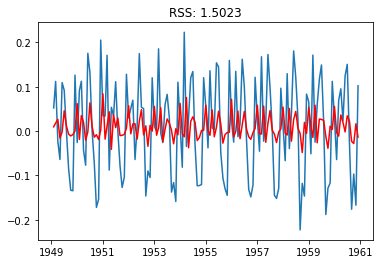

In [26]:
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

MA model (이동평균모델)

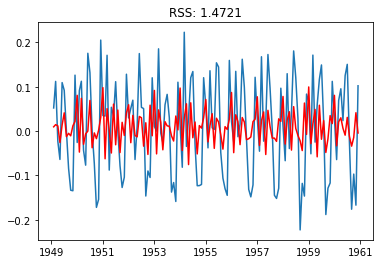

In [27]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Combined Model <br>
혼합모델

/home/markbaum/Python/Jupyter/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


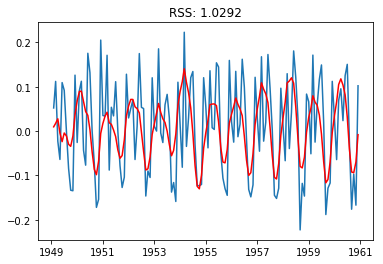

In [28]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### 분석데이터를 원본으로 되돌리기
Taking it back to original scale

In [29]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

time
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [30]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

time
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [31]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

time
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

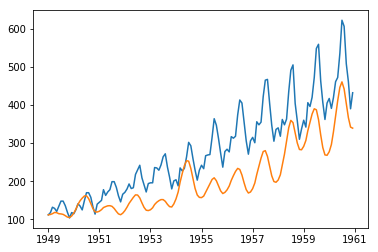

In [32]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [34]:
import numpy as np

In [41]:
x = [ index   for index in range(len(df.index))]

In [43]:
m , b = np.polyfit(x, df.AirPassengers, 1)

In [44]:
print(m, b)

2.65718390805 90.3099616858


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

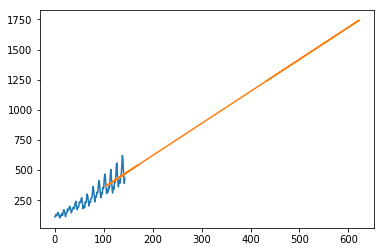

In [55]:
plt.plot(x, df, '-')
plt.plot(df, (m*df+b), '-')

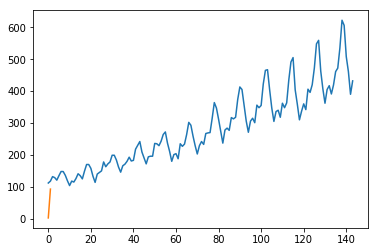

In [60]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = x
Y = df.AirPassengers

results = sm.OLS(Y,sm.add_constant(X)).fit()
#print results.summary()
#plt.scatter(X,Y)
#X_plot = np.linspace(0,1,100)
plt.plot(x, df, '-')
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
plt.show()

In [70]:
y = df.AirPassengers.values

x = pd.Series(x)

import seaborn as sns; sns.set(color_codes=True)
sns.regplot(x, y, color="g")